## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Get dataset

In [2]:
data_dir = pathlib.Path("./LaptopVsPc")

## Analyse data

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

248


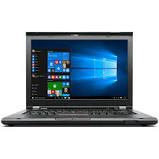

In [4]:
laptops = list(data_dir.glob('laptop/*'))
PIL.Image.open(str(laptops[5]))

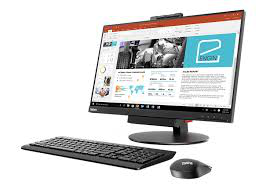

In [5]:
pc = list(data_dir.glob('pc/*'))
PIL.Image.open(str(pc[5]))

## Create dataset

In [6]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.9, 1.1),
    horizontal_flip=True,
    vertical_flip=False
)

IMG_HEIGHT, IMG_WIDTH = 180, 180
batch_size = 32

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=data_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
print(train_data_gen.class_indices)   


Found 248 images belonging to 2 classes.
{'laptop': 0, 'pc': 1}


## Look at generated samples

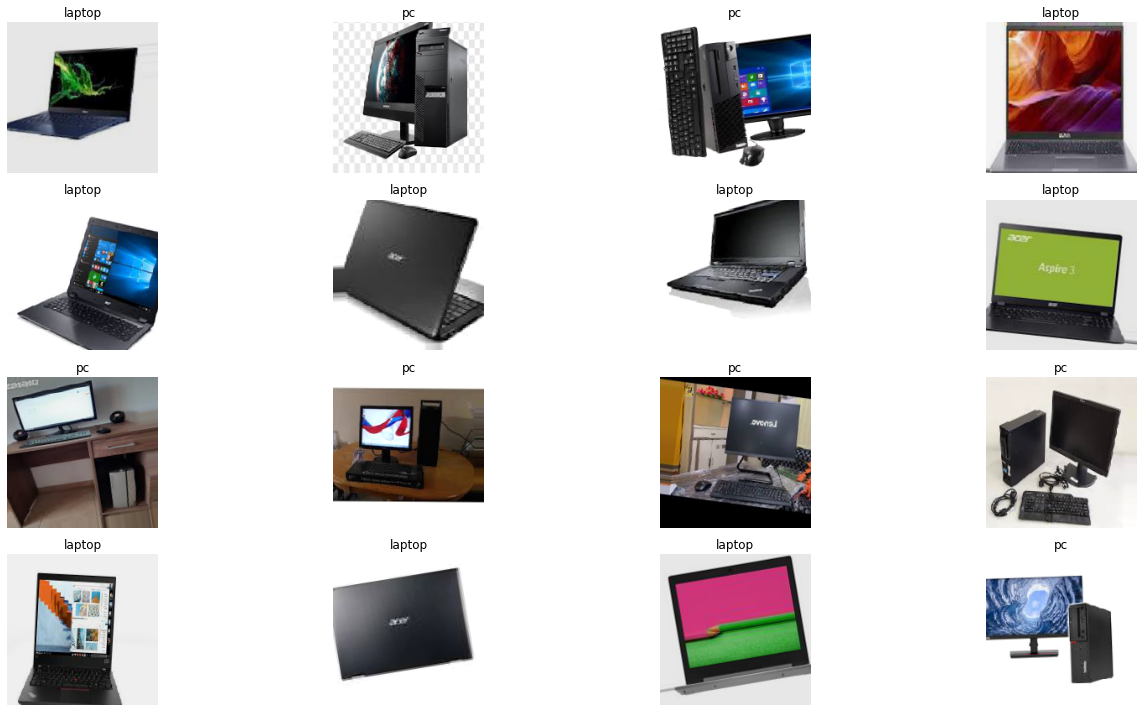

In [7]:
sample_training_images, labels = next(train_data_gen)
class_label = {v:k for k,v in train_data_gen.class_indices.items()}
fig, axes = plt.subplots(4, 4, figsize=(20,10))
axes = axes.flatten()
for img, label, ax in zip(sample_training_images, labels, axes):
    ax.set_title(class_label[np.argmax(label)])
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()

## Create model

In [8]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile model

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

## Trainining model

In [19]:
epochs = 5
model.fit(train_data_gen,
          steps_per_epoch=image_count / batch_size, epochs=epochs)

Epoch 1/5
8/7 [==============================] - 5s 600ms/step - loss: 8.8345 - accuracy: 0.5685
Epoch 2/5
8/7 [==============================] - 5s 568ms/step - loss: 9.6839 - accuracy: 0.6008
Epoch 3/5
8/7 [==============================] - 5s 572ms/step - loss: 9.6839 - accuracy: 0.6008
Epoch 4/5
8/7 [==============================] - 5s 574ms/step - loss: 9.6839 - accuracy: 0.6008
Epoch 5/5
8/7 [==============================] - 5s 573ms/step - loss: 9.6839 - accuracy: 0.6008
